<a href="https://colab.research.google.com/github/Rik1995/Netflix-movies-and-tv-shows-clustering/blob/main/Ripan_khan_netflix_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

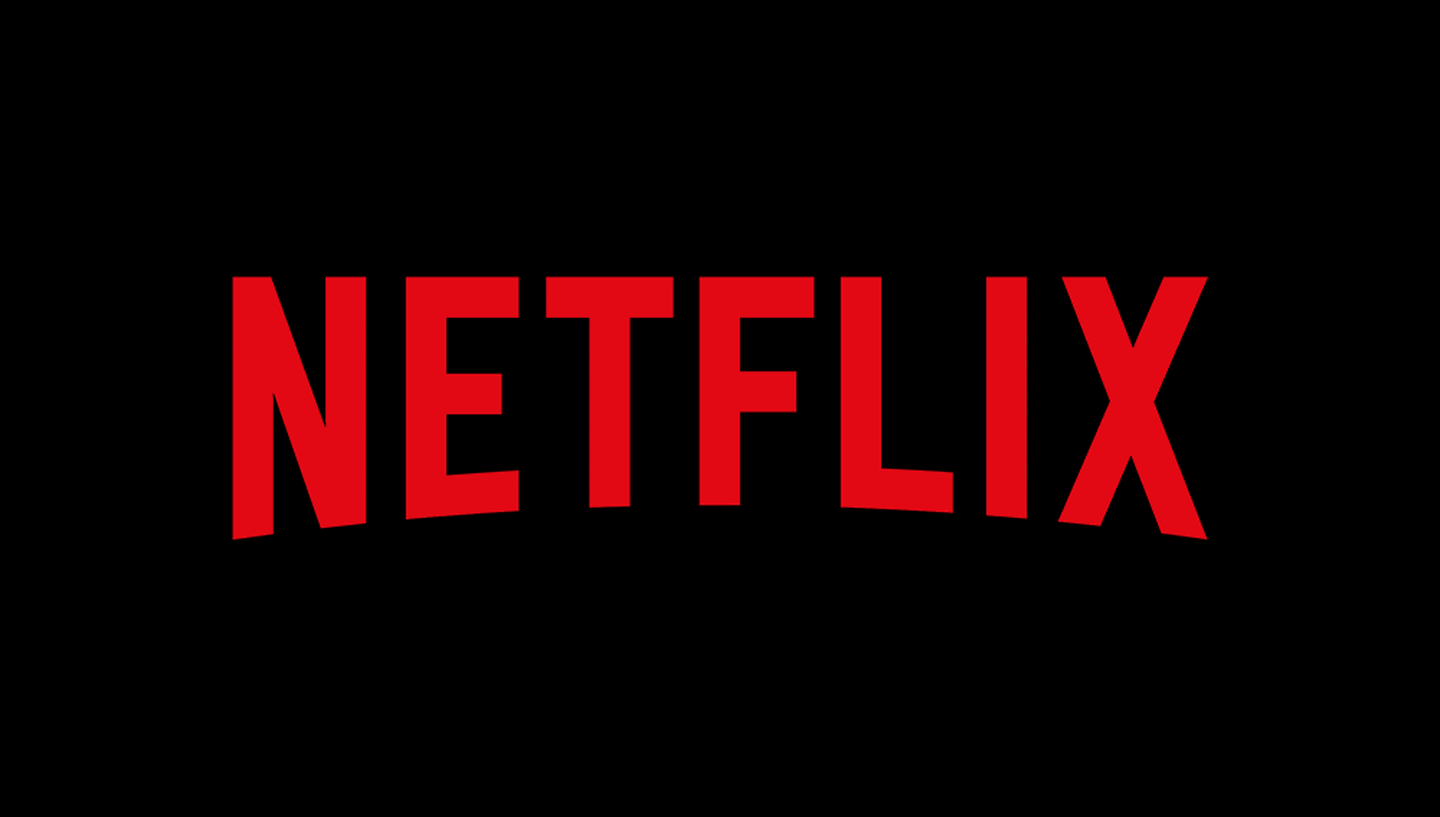

# **Project Name**    -  NETFLIX MOVIES AND TV SHOWS CLUSTERING


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Ripan Khan

# **Project Summary -**

**Netflix, Inc.** is an American subscription video on-demand over-the-top streaming service and production company based in Los Gatos, California. Founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals.


In this project,i have done following things:-

* Exploratory Data Analysis.

* Understanding what type content is available in different countries.

* Is Netflix has increasingly focusing on TV rather than movies in recent years.

* Clustering similar content by matching text-based features.

# **GitHub Link -**

https://github.com/Rik1995/Netflix-movies-and-tv-shows-clustering

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

**In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

**Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.** 

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [98]:
# Import Libraries
import numpy as np
import pandas as pd
import missingno as msno
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/Unsupervised ml/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [101]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [102]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [103]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [104]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [96]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

show_id         0
duration        0
text_data       0
cast_name       0
month_added     0
year_added      0
description     0
listed_in       0
rating          0
type            0
release_year    0
date_added      0
country         0
cast            0
director        0
title           0
cluster         0
dtype: int64

<BarContainer object of 12 artists>

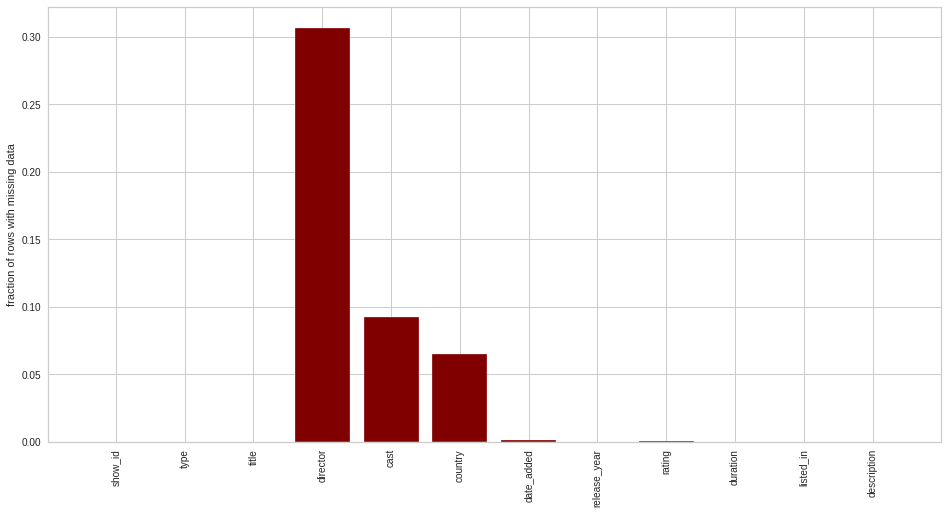

In [105]:
# Visualizing the missing values
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts,color='maroon')

### What did you know about your dataset?

* There are no duplicated values
* There are some missing values
* 2389 nulls in 'director'
718 in 'cast'
507 in 'country'
10 in 'date_added'
7 in rating

## ***2. Understanding Your Variables***

In [106]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [107]:
# Dataset Describe
df.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description 

* **show_id** : Unique ID for every Movie / Tv Show

* **type** : Identifier - A Movie or TV Show

* **title** : Title of the Movie / Tv Show

* **director** : Director of the Movie

* **cast**: Actors involved in the movie / show

* **country** : Country where the movie / show was produced

* **date_added** : Date it was added on Netflix

* **release_year** : Actual Releaseyear of the movie / show

* **rating** : TV Rating of the movie / show

* **duration**: Total Duration - in minutes or number of seasons

* **listed_in** : Genre

* **description**: The Summary description

### Check Unique Values for each variable.

In [108]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [5]:
# Write your code to make your dataset analysis ready.
df['rating'].replace(np.nan, 'TV-MA',inplace  = True)
df['country'].replace(np.nan, 'United States',inplace  = True)
df['cast'].replace(np.nan, 'Missing info',inplace  = True)
df['director'].replace(np.nan, "Unknown",inplace  = True)

df = df[df['date_added'].notna()]

### What all manipulations have you done and insights you found?

* **Rating & Country** - As rating column has 0.08% null values , so replacing nulls with mose frequent TV-MA rating and doing same thing with country column

* **Cast**  - cast column has too many different values and more than 9% are missing, so there is no need to keep it but we are keeping it to perform EDA.

* **Date**  - there are few missing values for date column. so, lets drop missing value rows.

* **Director** - Director column has more then 30% null values ,I am replacing those missing values with the text "Unknown".

In [110]:
# Readjusting date added column and adding new features
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Chart - 1
### Types of contents

<AxesSubplot:xlabel='type', ylabel='count'>

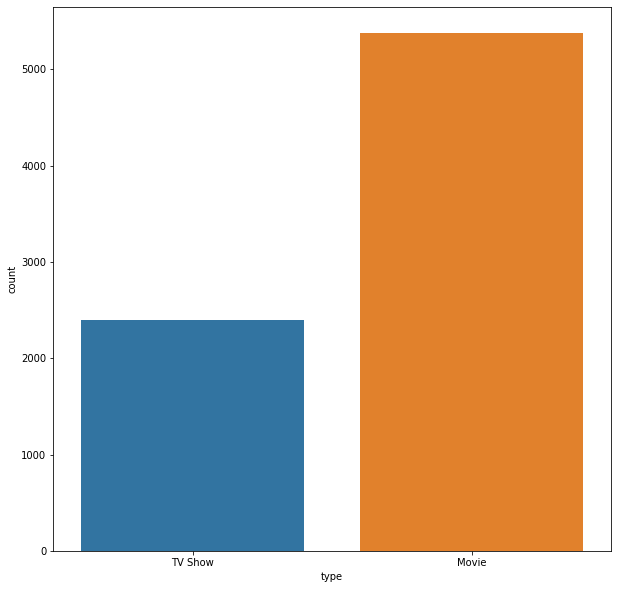

In [7]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
sns.countplot(x='type', data = df)

### Better visualisation

In [12]:
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
fig_donut = px.pie(df, names='type', height=300, width=600, hole=0.7,

title='Most watched on Netflix',

color_discrete_sequence=['#b20710', '#221f1f'])

fig_donut.update_traces(hovertemplate=None, textposition='outside',

textinfo='percent+label', rotation=90)

fig_donut.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,

plot_bgcolor='#333', paper_bgcolor='#333',

title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),

font=dict(size=17, color='#8a8d93'),

hoverlabel=dict(bgcolor="#444", font_size=13,

font_family="Lato, sans-serif"))
fig_donut.show(renderer='colab')

##### 1. Why did you pick the specific chart?

To check types of netflix content.

##### 2. What is/are the insight(s) found from the chart?

* It is evident that there are more movies on Netflix than TV shows.
* Netflix has 5377 movies, which is more than double the quantity of TV shows.
* There are about 70% movies and 30% TV shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It will help to decide which type of content is to be made most.

#### Chart - 2
Checking the common words in tite column.

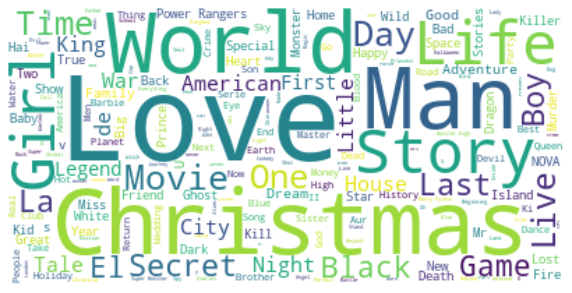

In [10]:
# Chart - 2 visualization code
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#subsetting df
df_word_cloud = df['title']
text = " ".join(word for word in df_word_cloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

word clouds provide a simple and effective way to extract meaning from text data, helping to identify important patterns and themes that might otherwise be overlooked.

##### 2. What is/are the insight(s) found from the chart?

 It seems like words like "Love", "Man", "Chritmas", "World", "Story" are very common in titles.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help in deciding the title to make profit.

#### Chart - 3 
### Lets see which country produced most movies and tv show

In [13]:
# Chart - 3 visualization code 
country = df['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'black', width = 2)))
fig.show()

##### 1. Why did you pick the specific chart?

To check which country produced more movies and tv shows.

##### 2. What is/are the insight(s) found from the chart?

United states produced the most movies and shows followed by India and UK.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes , it will help in deciding in which country to release the movies or the shows to make more profit. 

#### Chart - 4
### Top 10 Directors with most number of Movies/Shows on Netflix

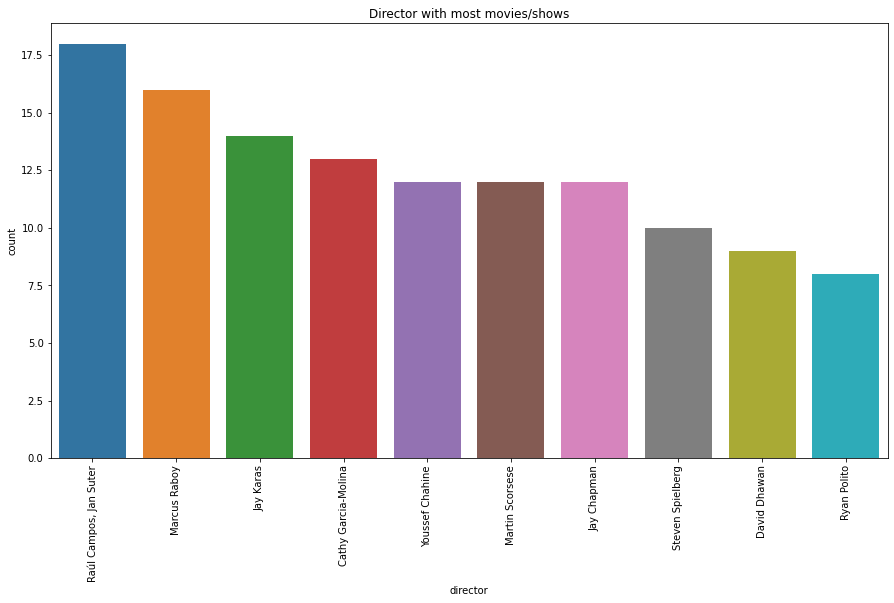

In [14]:
# Chart - 4 visualization code
direct=df.copy()
#removing unknown 
direct=direct[df['director']!='Unknown']
#plot for director
plt.figure(figsize = (15,8))
sns.countplot(x='director',data=direct,order=direct.director.value_counts().head(10).index)
plt.title('Director with most movies/shows')
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

To check the top 10 directors with most views.

##### 2. What is/are the insight(s) found from the chart?

Raul Campos and Jan Suter collectively have the most content on Netflix followed by Marcus and Jay respectivly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, it will help us choose the director for the next movie or show.

#### Chart - 5
### Top 10 actors

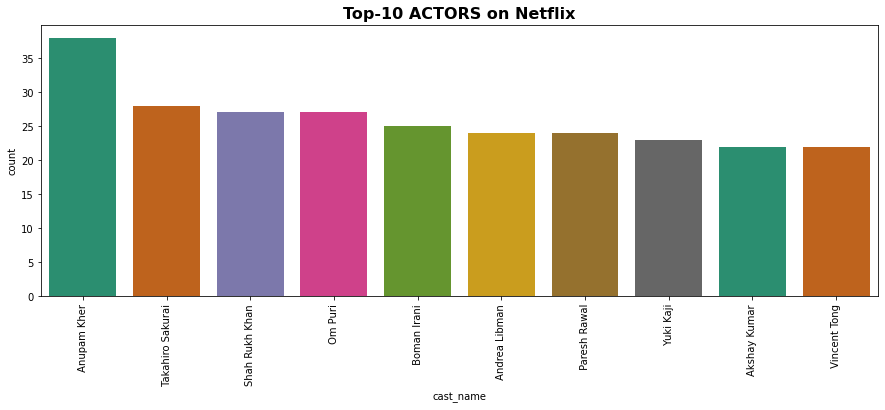

In [15]:
# Chart - 5 visualization code
df['cast_name'] = df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-10 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To check the top 10 actors with highest count of movies

##### 2. What is/are the insight(s) found from the chart?

The top actors on Netflix Movies, based on the number of titles, are Anupam Kher followed by Takahiro Sakurai ans Shahrukh Khan.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which actor to cast in movies or shows to get more audience.

#### Chart - 6
Total Releases for Last 10 Years

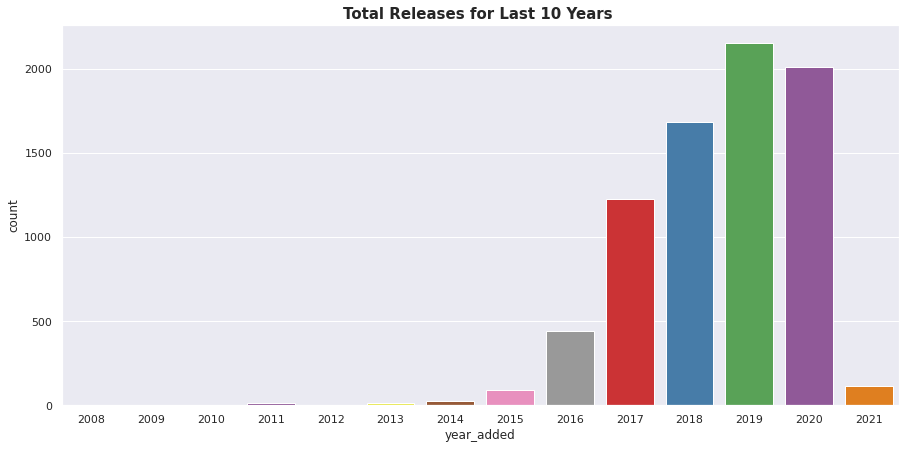

In [16]:
# Chart - 6 visualization code
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=df,palette="Set1")

plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

##### 1. Why did you pick the specific chart?

To check the total Releases for Last 10 Years.

##### 2. What is/are the insight(s) found from the chart?

The number of releases have significantly increased after 2015 and have dropped in 2021 becase of Corona situation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, it will help in creating a positive buisness impact.

#### Chart - 7
Checking the type and rating of the contents

In [17]:
# Chart - 7 visualization code
#distribution for content using plotly
temp_df = df['rating'].value_counts().reset_index()

# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['rating'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'MOST OF PROGRAMME ON NETFLIX IS TV-14 & TV-MA RATED' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer='colab')

In [18]:
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['rating'].value_counts().reset_index()
temp_df2 = df2['rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['rating'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['rating'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",title = 'RATING BY CONTENT TYPE' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show(renderer='colab')

##### 1. Why did you pick the specific chart?

To check the types of shows and its ratings.

##### 2. What is/are the insight(s) found from the chart?

As we can see Tv mature audience got highest ratings for movies and also for shows. followed by R rated content for movies and kids tv shows for shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which type of content to make most for profit.

#### Chart - 8
###Top ten Genre 

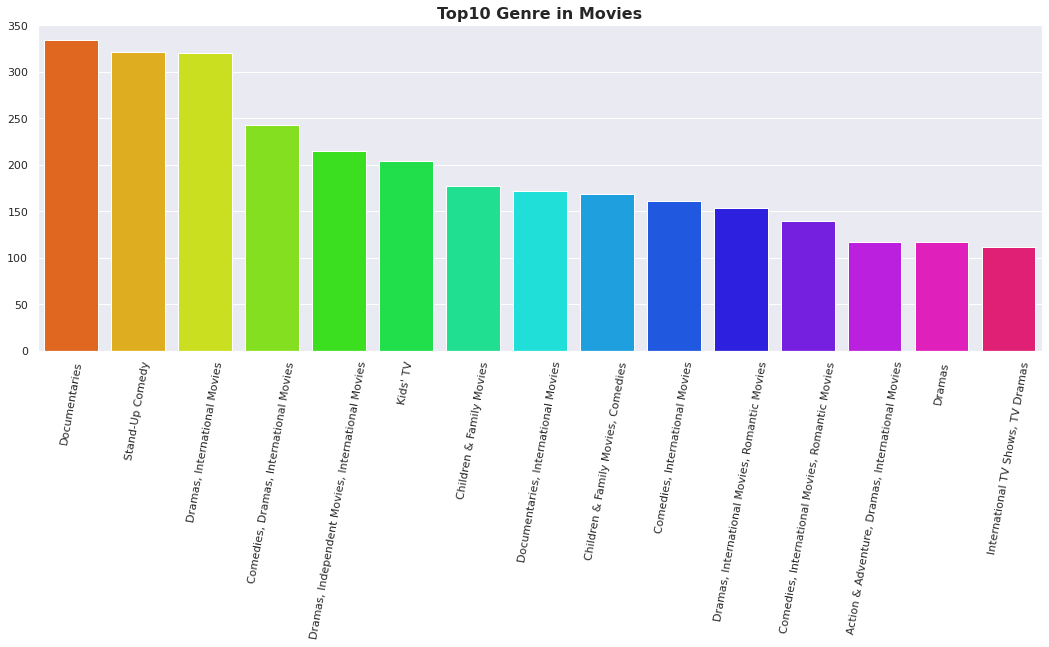

In [19]:
# Chart - 8 visualization code
plt.figure(figsize=(18,6))
sns.barplot(x = df["listed_in"].value_counts().head(15).index,
            y = df["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

To check the Top 10 Genre in Movies.

##### 2. What is/are the insight(s) found from the chart?

From the graph, we can tell that Documentaries take the first place, followed by Stand-up Comedy and Dramas,International Movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide which genre movies to make most.

Here the Top 20 Genre in whole Netflix

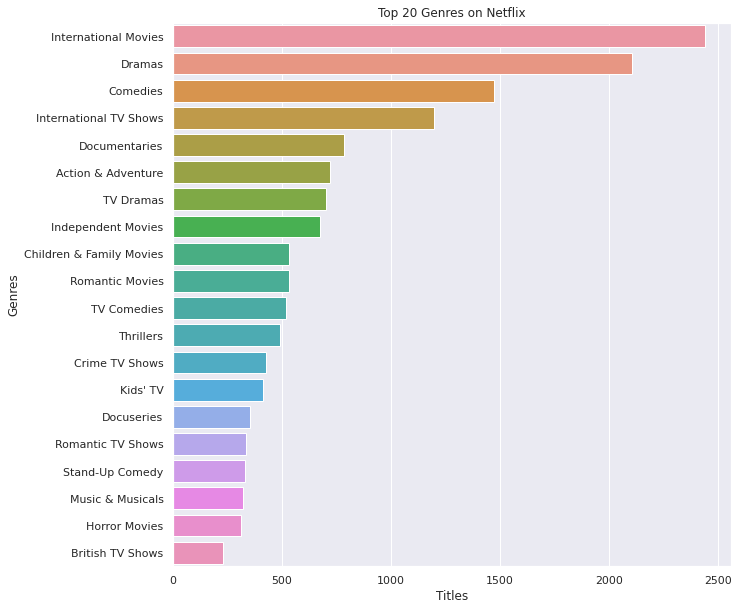

In [20]:
#Extract the Genres
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))

#Plot the count of top 20 genres
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

As you can see on whole Netflix genre, International movies dominated the list closely followed by Dramas and comedy.

#### Chart - 9
###Duration

<AxesSubplot:xlabel='duration', ylabel='Density'>

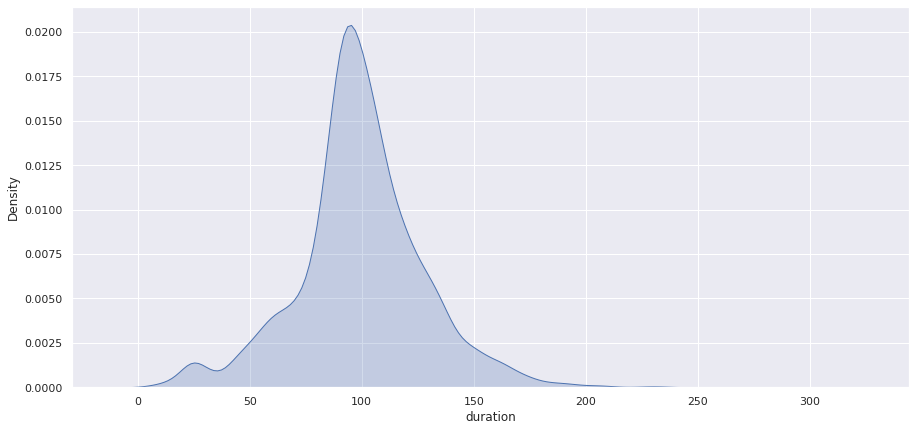

In [21]:
# Chart - 9 visualization code
#subsetting TV Show and Movie for duration
netflix_shows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']
#movie duration subsetting
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
#Analysis on the duration of the movies 
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

##### 1. Why did you pick the specific chart?

To check the movie duration time.

##### 2. What is/are the insight(s) found from the chart?

* Above histogram plot, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense.

* Most content are about 70 to 120 min duration for movies

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to decide what time duration most movies should be to attract more audience.

#### Chart - 10
###Word Cloud for Movie on Description Column

In [22]:
#word cloud for user rating review
def func_select_Category(category_name,category_column,column_of_choice):
  df_word_cloud = df[[category_column,column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud[category_column]==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

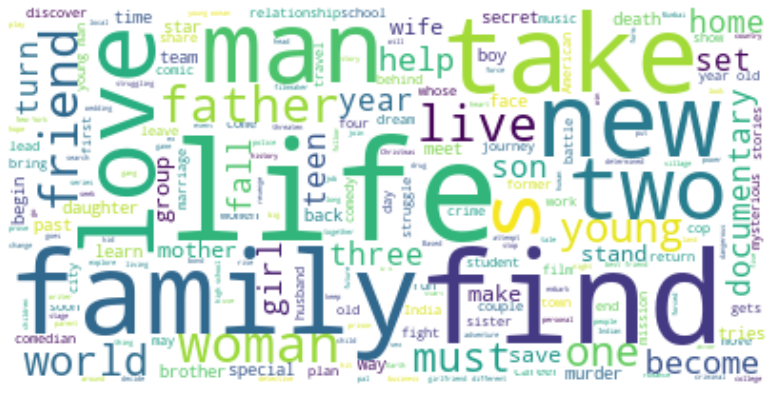

In [23]:
# Chart - 10 visualization code
## woeld cloud for movies
func_select_Category('Movie','type','description')

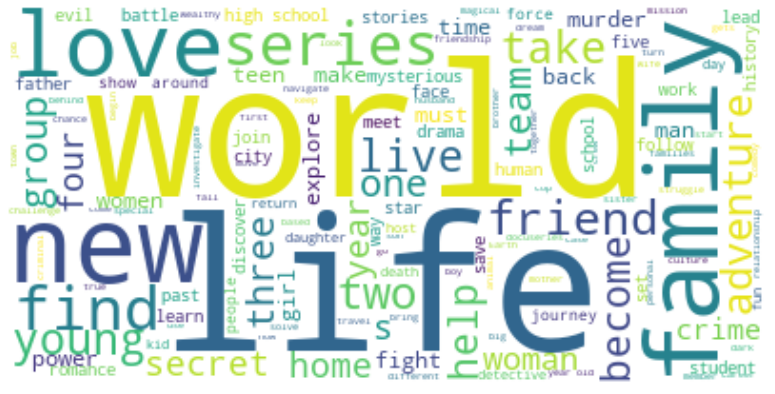

In [24]:
## world cloud for shows
func_select_Category('TV Show','type','description')

##### 1. Why did you pick the specific chart?

To check the common words in the description column. 

##### 2. What is/are the insight(s) found from the chart?

Most words like Life, family popping up in the movies.

Most words like Life, family popping up in the shows like movies before!

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, it will help to create a positive buisness impact.

#### Chart - 11
###Is Netflix has increasingly focusing on TV rather than movies in recent years.?

In [25]:
# Chart - 11 visualization code
#subsetting data for visualisation
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(
                    x=vc1[col], 
                    y=vc1["count"], 
                    name="TV Shows", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=vc2[col], 
                    y=vc2["count"], 
                    name="Movies", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content added over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show(renderer='colab')

##### 1. Why did you pick the specific chart?

Hyp : In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

##### 2. What is/are the insight(s) found from the chart?

As we can see the number of tv shows has increased but number of movies have also increased.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, it will craeate a positive buisness impact.

#### Chart - 14 - Correlation Heatmap

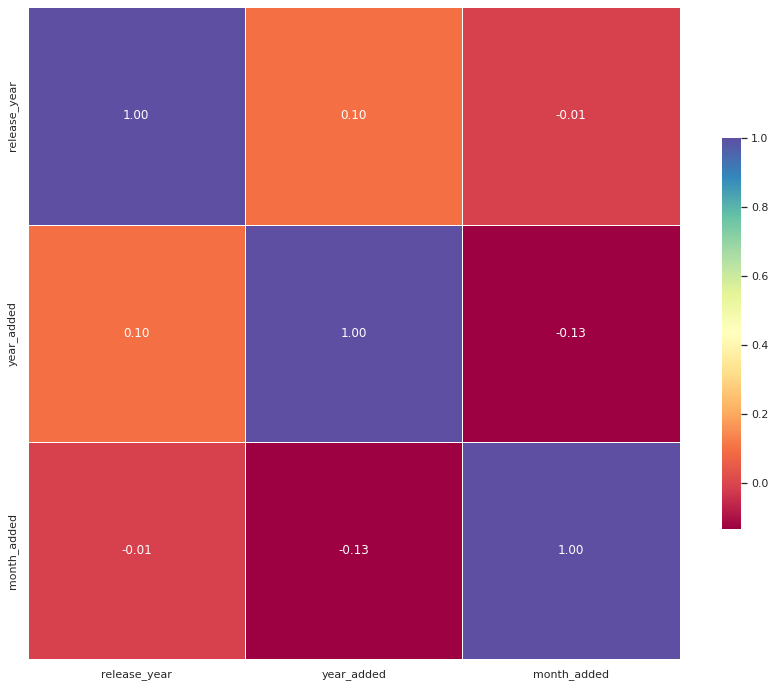

In [26]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap="Spectral", cbar_kws={'shrink': .6}, square=True, annot=True, fmt='.2f', linewidths=.8)
plt.show()

###Most of the columns of the dataset are of string type so those are not possible to plot a Correlation heatmap.

#### Chart - 15 - Pair Plot 

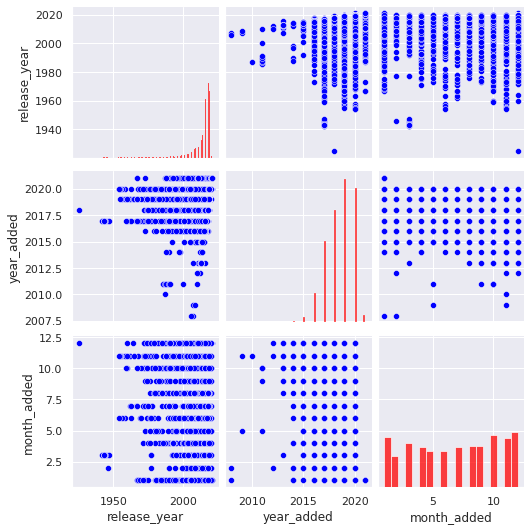

In [27]:
# Pair Plot visualization code
sns.pairplot(df,diag_kws={'color':'red'},plot_kws={'color':'blue'})

###Most of the columns of the dataset are of string type so those are not possible to plot a Pair Plot.

## ***5. Hypothesis Testing***

###Hypothetical Statement - 1

Here we will test that is there any relation between the year(year_added) of that content added with the type of the content(type).


* **Null Hypothesis:** year_added has no impact on type of content that gets added to the platform.

* **Alternative Hypothesis**: year_added has impact on type of content that gets added to the platform.

In [111]:
hypo_data = pd.crosstab(df['type'], df['year_added'], margins=False)
hypo_data

year_added  2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  2014.0  2015.0  \
type                                                                         
Movie            1       2       1      13       3       6      19      58   
TV Show          1       0       0       0       0       5       6      30   

year_added  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0  
type                                                        
Movie          258     864    1255    1497    1312      88  
TV Show        185     361     430     656     697      29

In [112]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

In [113]:
p

8.635372719955464e-11

Here we can see the p-value is greater than 0.05, so we can reject null hypothesis. 
So we can conclude that there is a impact of year_added on the type of content.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [127]:
# Handling Missing Values & Missing Value Imputation
# already handled.

### 2. Handling Outliers

In [28]:
# Handling Outliers & Outlier treatments
##There aren't any outliers in the dataset as the column datatypes are of string format.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [30]:
# Expand Contraction
# creating tags column using all text column which one is used for model building purpose.
df['text_data'] = df['director'] + df['cast'] + df['country'] + \
                     df['rating'] + df['listed_in'] + df['description']

In [31]:
# checking the first row
df['text_data'][0]

'UnknownJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilTV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 3. Removing Punctuations

In [32]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [33]:
# applying remove_punctuation function
df['text_data'] = df['text_data'].apply(remove_punctuation)

In [34]:
# checking the first row after the process
df['text_data'][0]

'UnknownJoão Miguel Bianca Comparato Michel Gomes Rodolfo Valente Vaneza Oliveira Rafael Lozano Viviane Porto Mel Fronckowiak Sergio Mamberti Zezé Motta Celso FrateschiBrazilTVMAInternational TV Shows TV Dramas TV SciFi  FantasyIn a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

#### 5. Removing Stopwords & Removing White spaces

In [35]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [39]:
# Remove Stopwords
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [40]:
# applying stopwords function.
df['text_data'] = df['text_data'].apply(stopwords)

In [41]:
# checking the first row again
df['text_data'][0]

'unknownjoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmainternational tv shows tv dramas tv scifi fantasyin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

#### 8. Text Normalization

In [42]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# create an object of stemming function
stemmer = SnowballStemmer("english")

# define a function to apply stemming using SnowballStemmer
def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [43]:
# appying stemming function
df['text_data'] = df['text_data'].apply(stemming)

In [44]:
# checking the first row after the process
df['text_data'][0]

'unknownjoão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmaintern tv show tv drama tv scifi fantasyin futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

#### 10. Text Vectorization

In [45]:
# Vectorizing Text
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['text_data'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [46]:
print(len(dictionary)) #number of independet features created from "text_data" columns

10000


In [47]:
# convert vector into array form for clustering
vector = tfidf.transform(df['text_data']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7777, 10000)
datatype : <class 'numpy.ndarray'>


##### Which text vectorization technique have you used and why?

I used the TF-IDF vectorizer, which stands for Term Frequency Inverse Document Frequency.

It transforms the text data into numerical data which can be easily processed by machine learning algorithms.

### 7. Dimesionality Reduction

In [49]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

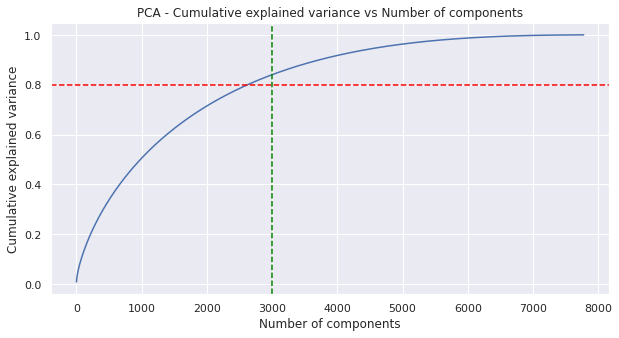

In [50]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

* We discover that approximately 7500 components account for 100 percent of the variance.

* 3000 components alone account for more than 80% of the variance.

* Therefore, we can take the top 3000 components to reduce dimensionality and simplify the model while still being able to capture more than 80% of the variance.

In [51]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [52]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(7777, 3000)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used Principal Component Analysis (PCA) to reduce the dimensionality of data.

Because It is a crucial step in machine learning and data analysis as it can help to improve the performance of models, reduce overfitting, and make it easier to visualize and interpret the data.

## ***7. ML Model Implementation***

### ML Model - 1

# K Means Clustering

In [53]:
# Sample code to run the KElbowVisualizer
from sklearn.cluster import KMeans

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=21), k=(4, 22),
                 metric='silhouette', timings=False)

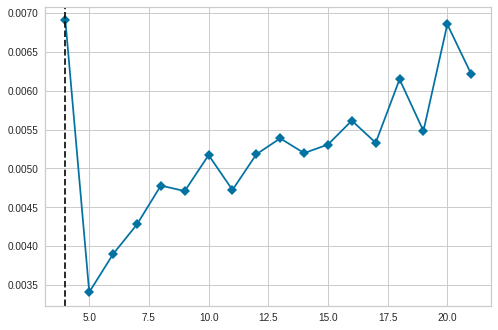

In [54]:
# Sample code to run the KElbowVisualizer
from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

#  # Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,22), metric='silhouette', timings=False
)

visualizer.fit(X)   

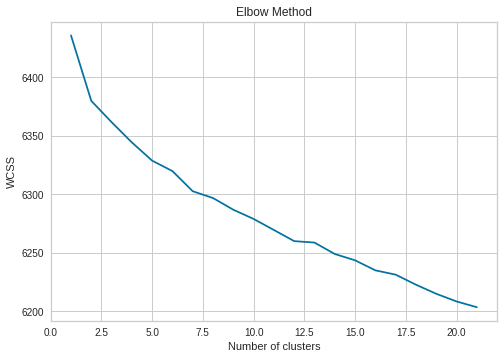

In [55]:
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From both the above plots, we have experimented and chosen 9 as optimal k

# Lets select optimal value of K as 9

In [56]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=9, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X)

KMeans(n_clusters=9, n_init=1)

In [58]:
from sklearn.metrics import silhouette_score

In [59]:
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X, kmeans.labels_))

Silhouette Coefficient:  0.007


In [60]:
#predict the labels of clusters.
label = kmeans.fit_predict(X)

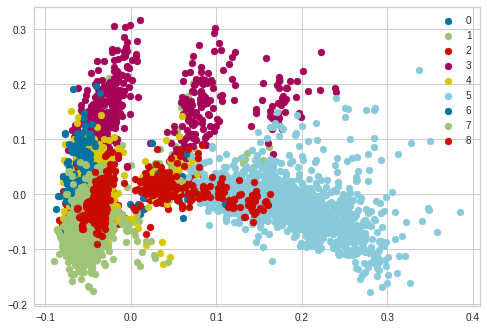

In [61]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

## Labelling the dataset as per the cluster

In [62]:
# kmeans label to cluster column
df['cluster'] = kmeans.labels_

In [63]:
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               Unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            Unknown                                            Nasty C   
7785            Unknown                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                       Missing info   

                                                country date_added  \
0                                                Brazil 2020-08-14   
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                      United States 2020-09-25   
7785                                          Australia 2020-10-31   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  year_added  \
0     In a future where the elite inhabit an island ...        2020   
1     After a devastating earthquake hits Mexico Cit...        2016   
2     When an army recruit is f

In [64]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [65]:
#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df[['cluster',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

## Word Cloud on Description col for different cluster

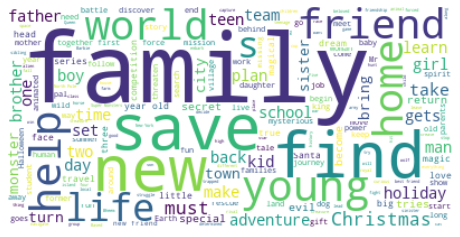

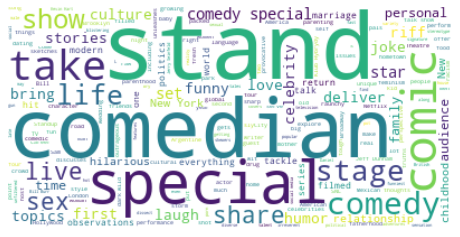

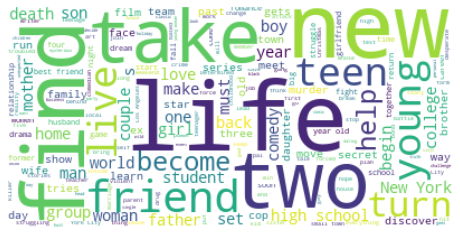

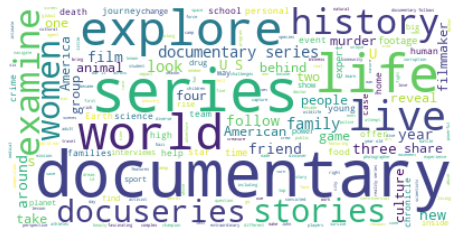

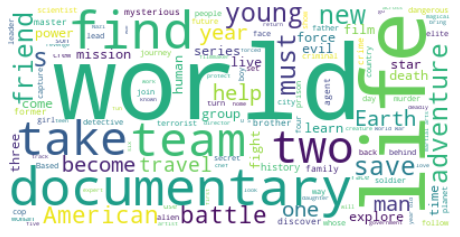

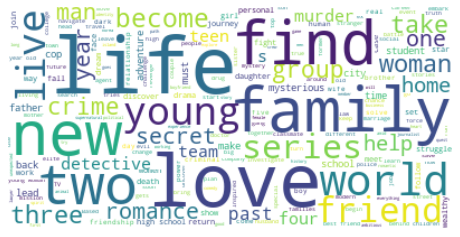

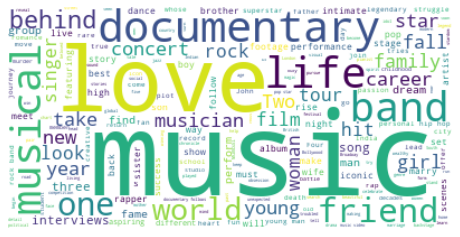

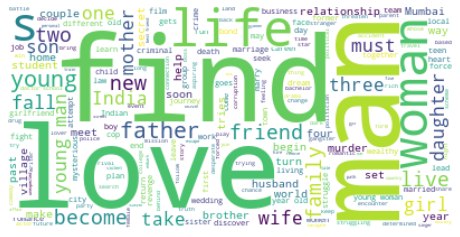

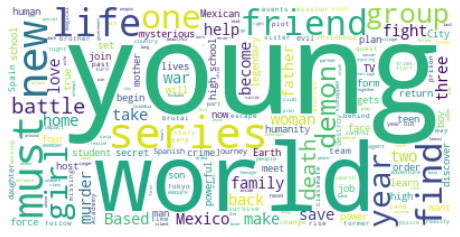

In [66]:
for i in range(9):
  func_select_Category(i,'description')

## Word Cloud on Title col for different cluster

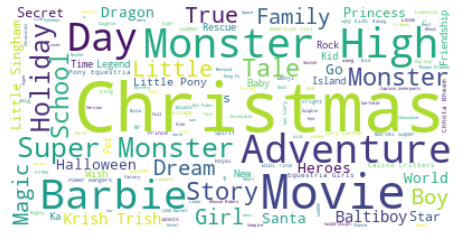

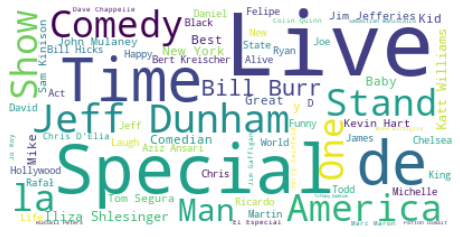

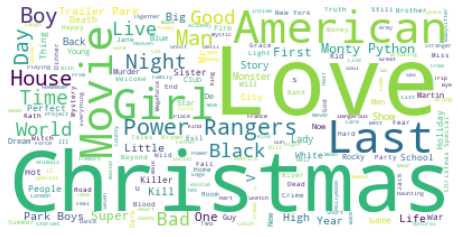

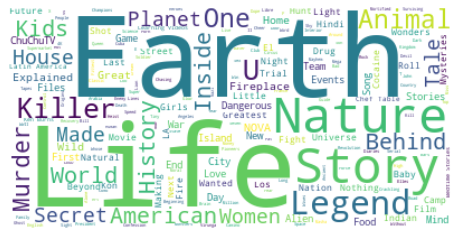

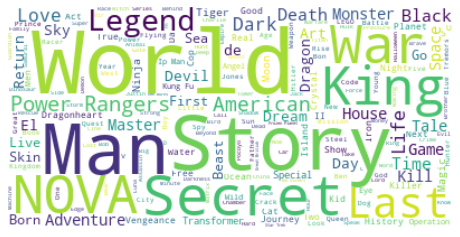

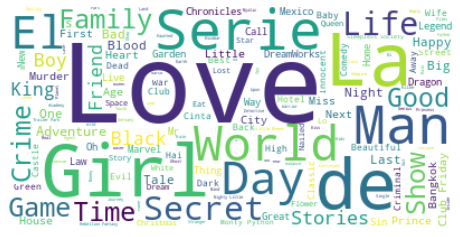

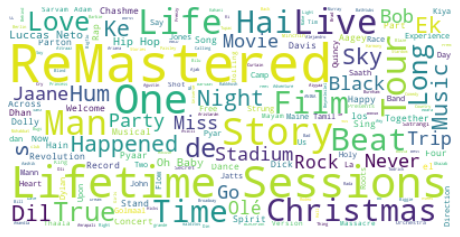

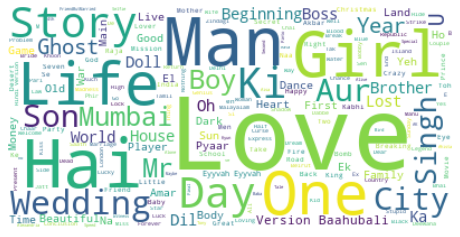

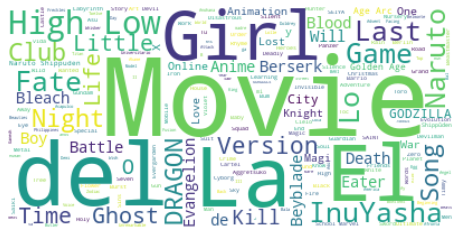

In [67]:
for i in range(9):
  func_select_Category(i,'title')

# Cluster 0: Kids

# Kids, Anime, Animation

In [69]:
df[df['cluster'] == 0][['type','title','director','cast','country','rating','listed_in','description']]

type                              title  \
29    TV Show                           #blackAF   
69      Movie                         14 Cameras   
102     Movie                3 Türken & ein Baby   
107     Movie                         37 Seconds   
113     Movie                48 Christmas Wishes   
...       ...                                ...   
7761    Movie                             Zapped   
7765    Movie                          Zero Hour   
7772    Movie  Zipi & Zape y la Isla del Capitan   
7776    Movie                           Zokkomon   
7781    Movie                               Zoom   

                            director  \
29                           Unknown   
69        Scott Hussion, Seth Fuller   
102                      Sinan Akkuş   
107                           Hikari   
113   Marco Deufemia, Justin G. Dyck   
...                              ...   
7761                   Peter DeLuise   
7765                Robert O. Peters   
7772                    Oskar Santos   
7776                Satyajit Bhatkal   
7781                    Peter Hewitt   

                                                   cast  \
29    Kenya Barris, Rashida Jones, Iman Benson, Genn...   
69    Neville Archambault, Amber Midthunder, Brytnee...   
102   Kostja Ullmann, Eko Fresh, Kida Khodr Ramadan,...   
107   Mei Kayama, Misuzu Kanno, Shunsuke Daitoh, Mak...   
113   Khiyla Aynne, Noah Dyer, Maya Franzoi, Clara K...   
...                                                 ...   
7761  Zendaya, Chanelle Peloso, Spencer Boldman, Emi...   
7765  Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...   
7772  Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...   
7776  Darsheel Safary, Anupam Kher, Manjari Fadnis, ...   
7781  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   

                    country rating                           listed_in  \
29            United States  TV-MA                         TV Comedies   
69            United States  TV-MA            Horror Movies, Thrillers   
102                 Germany  TV-MA      Comedies, International Movies   
107                   Japan  TV-MA        Dramas, International Movies   
113                  Canada   TV-G  Children & Family Movies, Comedies   
...                     ...    ...                                 ...   
7761  Canada, United States   TV-Y  Children & Family Movies, Comedies   
7765          United States  TV-MA     International Movies, Thrillers   
7772                  Spain  TV-PG  Children & Family Movies, Comedies   
7776                  India     PG    Children & Family Movies, Dramas   
7781          United States     PG  Children & Family Movies, Comedies   

                                            description  
29    Kenya Barris and his family navigate relations...  
69    Upping the “13 Cameras” ante, this sequel find...  
102   The lives of three dissatisfied brothers runni...  
107   Trapped by society and familial obligations, a...  
113   When a small town's letters to Santa accidenta...  
...                                                 ...  
7761  A girl discovers a dog-training app that can g...  
7765  After his father passes, the heir to a retail ...  
7772  At Christmas, Zip and Zap take a trip with the...  
7776  When his cruel uncle abandons him, a young orp...  
7781  Dragged from civilian life, a former superhero...  

[646 rows x 8 columns]

#Cluster 1:  Musical, International, Indian

In [70]:
df[df['cluster'] == 1][['type','title','director','cast','country','rating','listed_in','description']]


type                                          title  \
305     Movie            Adam Devine: Best Time of Our Lives   
307     Movie                        ADAM SANDLER 100% FRESH   
310     Movie                   Adel Karam: Live from Beirut   
312     Movie  Aditi Mittal: Things They Wouldn't Let Me Say   
320     Movie                      Afonso Padilha: Classless   
...       ...                                            ...   
7656    Movie                  Wonho Chung: Live in New York   
7680    Movie                          Wyatt Cenac: Brooklyn   
7719    Movie            Yoo Byung Jae: Too Much Information   
7757    Movie    Zach Galifianakis: Live at the Purple Onion   
7779  TV Show                                      Zona Rosa   

                          director  \
305                      Jay Karas   
307                    Steve Brill   
310                        Unknown   
312                  Fazila Allana   
320   Junior Carelli, Rudge Campos   
...                            ...   
7656                     Shaun Mir   
7680                   Wyatt Cenac   
7719                 Yoo Byung-jae   
7757               Michael Blieden   
7779                       Unknown   

                                                   cast        country rating  \
305                                         Adam Devine  United States  TV-MA   
307                                        Adam Sandler  United States  TV-MA   
310                                          Adel Karam  United States  TV-MA   
312                                        Aditi Mittal          India  TV-MA   
320                                      Afonso Padilha         Brazil  TV-MA   
...                                                 ...            ...    ...   
7656                                        Wonho Chung  United States  TV-14   
7680                                        Wyatt Cenac  United States  TV-MA   
7719                                      Yoo Byung-jae  United States  TV-MA   
7757                     Zach Galifianakis, Brian Unger  United States  TV-MA   
7779  Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...         Mexico  TV-MA   

                                              listed_in  \
305                                     Stand-Up Comedy   
307                                     Stand-Up Comedy   
310                                     Stand-Up Comedy   
312                                     Stand-Up Comedy   
320                                     Stand-Up Comedy   
...                                                 ...   
7656                                    Stand-Up Comedy   
7680                                    Stand-Up Comedy   
7719                                    Stand-Up Comedy   
7757                                    Stand-Up Comedy   
7779  International TV Shows, Spanish-Language TV Sh...   

                                            description  
305   Frenetic comic Adam Devine talks teen awkwardn...  
307   From "Heroes" to "Ice Cream Ladies" – Adam San...  
310   From Casino du Liban, Lebanese actor and comed...  
312   Trailblazing comic Aditi Mittal mixes topical ...  
320   Brazilian comedian Afonso Padilha dives into h...  
...                                                 ...  
7656  At the Comic Strip's first Arabic stand-up sho...  
7680  Wyatt Cenac heads to Brooklyn to share his obs...  
7719  "Saturday Night Live Korea" writer-turned-come...  
7757  The unorthodox, piano-playing stand-up star Za...  
7779  An assortment of talent takes the stage for a ...  

[332 rows x 8 columns]

#Cluster 2: Drama, International, Indian

In [71]:
df[df['cluster'] == 2][['type','title','director','cast','country','rating','listed_in','description']]

type                       title         director  \
4       Movie                          21   Robert Luketic   
7       Movie                         187   Kevin Reynolds   
10      Movie                        1922     Zak Hilditch   
15      Movie                      Oct-01   Kunle Afolayan   
19      Movie                         '89          Unknown   
...       ...                         ...              ...   
7750  TV Show             Yu-Gi-Oh! Arc-V          Unknown   
7752  TV Show               Yummy Mummies          Unknown   
7758    Movie  Zack and Miri Make a Porno      Kevin Smith   
7774    Movie                      Zodiac    David Fincher   
7778    Movie                  Zombieland  Ruben Fleischer   

                                                   cast         country  \
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   United States   
7     Samuel L. Jackson, John Heard, Kelly Rowan, Cl...   United States   
10    Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...   United States   
15    Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...         Nigeria   
19                   Lee Dixon, Ian Wright, Paul Merson  United Kingdom   
...                                                 ...             ...   
7750  Mike Liscio, Emily Bauer, Billy Bob Thompson, ...   Japan, Canada   
7752  Lorinska Merrington, Jane Scandizzo, Rachel Wa...       Australia   
7758  Seth Rogen, Elizabeth Banks, Craig Robinson, J...   United States   
7774  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   United States   
7778  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   United States   

     rating                                      listed_in  \
4     PG-13                                         Dramas   
7         R                                         Dramas   
10    TV-MA                              Dramas, Thrillers   
15    TV-14        Dramas, International Movies, Thrillers   
19    TV-PG                                  Sports Movies   
...     ...                                            ...   
7750  TV-Y7                         Anime Series, Kids' TV   
7752  TV-MA             International TV Shows, Reality TV   
7758      R  Comedies, Independent Movies, Romantic Movies   
7774      R                 Cult Movies, Dramas, Thrillers   
7778      R                        Comedies, Horror Movies   

                                            description  
4     A brilliant group of students become card-coun...  
7     After one of his high school students attacks ...  
10    A farmer pens a confession admitting to his wi...  
15    Against the backdrop of Nigeria's looming inde...  
19    Mixing old footage with interviews, this is th...  
...                                                 ...  
7750  Now that he's discovered the Pendulum Summonin...  
7752  It's drama Down Under when expectant mothers w...  
7758  Zack and Miri make and star in an adult film t...  
7774  A political cartoonist, a crime reporter and a...  
7778  Looking to survive in a world taken over by zo...  

[1334 rows x 8 columns]

#Cluster 3: Documentaries, Sports


In [72]:
df[df['cluster'] == 3][['type','title','director','cast','country','rating','listed_in','description']]

type                            title  \
25      Movie                         (T)ERROR   
26    TV Show                         (Un)Well   
35      Movie                        #Rucker50   
52      Movie             100 Days Of Solitude   
53    TV Show                       100 Humans   
...       ...                              ...   
7653  TV Show                Women Behind Bars   
7661  TV Show                 Word Party Songs   
7670  TV Show              World's Most Wanted   
7679    Movie  WWII: Report from the Aleutians   
7686    Movie           XV: Beyond the Tryline   

                                    director  \
25    Lyric R. Cabral, David Felix Sutcliffe   
26                                   Unknown   
35                     Robert McCullough Jr.   
52                                   Unknown   
53                                   Unknown   
...                                      ...   
7653                                 Unknown   
7661                                 Unknown   
7670                                 Unknown   
7679                             John Huston   
7686                        Pierre Deschamps   

                                        cast         country rating  \
25                              Missing info   United States     NR   
26                              Missing info   United States  TV-MA   
35                              Missing info   United States  TV-PG   
52                              Missing info           Spain  TV-MA   
53    Zainab Johnson, Sammy Obeid, Alie Ward   United States  TV-14   
...                                      ...             ...    ...   
7653                            Missing info   United States  TV-14   
7661                            Missing info   United States   TV-Y   
7670                            Missing info   United States  TV-14   
7679                            Missing info   United States  TV-PG   
7686                            Missing info  United Kingdom  TV-14   

                                              listed_in  \
25                                        Documentaries   
26                                           Reality TV   
35                         Documentaries, Sports Movies   
52                  Documentaries, International Movies   
53                      Docuseries, Science & Nature TV   
...                                                 ...   
7653                         Crime TV Shows, Docuseries   
7661                                           Kids' TV   
7670  Crime TV Shows, Docuseries, International TV S...   
7679                                      Documentaries   
7686                       Documentaries, Sports Movies   

                                            description  
25    This real-life look at FBI counterterrorism op...  
26    This docuseries takes a deep dive into the luc...  
35    This documentary celebrates the 50th anniversa...  
52    Spanish photographer José Díaz spends 100 days...  
53    One hundred hardy souls from diverse backgroun...  
...                                                 ...  
7653  This reality series recounts true stories of w...  
7661  Sing along and dance with Bailey, Franny, Kip,...  
7670  Suspected of heinous crimes, they’ve avoided c...  
7679  Filmmaker John Huston narrates this Oscar-nomi...  
7686  Set against the 2015 Rugby World Cup, this doc...  

[540 rows x 8 columns]

#Cluster 4: Drama, American, Adventure

In [73]:
df[df['cluster'] == 4][['type','title','director','cast','country','rating','listed_in','description']]

type                  title             director  \
2       Movie                  23:59         Gilbert Chan   
3       Movie                      9          Shane Acker   
13      Movie                  2,215  Nottapon Boonprakob   
14      Movie                   3022           John Suits   
17      Movie                 22-Jul      Paul Greengrass   
...       ...                    ...                  ...   
7737    Movie            Young Tiger               Mu Chu   
7759  TV Show              Zak Storm              Unknown   
7771    Movie                   Zion           Floyd Russ   
7782    Movie                   Zozo          Josef Fares   
7785  TV Show  Zumbo's Just Desserts              Unknown   

                                                   cast  \
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3     Elijah Wood, John C. Reilly, Jennifer Connelly...   
13                                   Artiwara Kongmalai   
14    Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...   
17    Anders Danielsen Lie, Jon Øigarden, Jonas Stra...   
...                                                 ...   
7737  Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...   
7759  Michael Johnston, Jessica Gee-George, Christin...   
7771                                         Zion Clark   
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7785                         Adriano Zumbo, Rachel Khoo   

                                                country rating  \
2                                             Singapore      R   
3                                         United States  PG-13   
13                                             Thailand  TV-MA   
14                                        United States      R   
17                       Norway, Iceland, United States      R   
...                                                 ...    ...   
7737                                          Hong Kong     NR   
7759      United States, France, South Korea, Indonesia  TV-Y7   
7771                                      United States  TV-PG   
7782  Sweden, Czech Republic, United Kingdom, Denmar...  TV-MA   
7785                                          Australia  TV-PG   

                                              listed_in  \
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
13    Documentaries, International Movies, Sports Mo...   
14      Independent Movies, Sci-Fi & Fantasy, Thrillers   
17                                    Dramas, Thrillers   
...                                                 ...   
7737           Action & Adventure, International Movies   
7759                                           Kids' TV   
7771                       Documentaries, Sports Movies   
7782                       Dramas, International Movies   
7785                 International TV Shows, Reality TV   

                                            description  
2     When an army recruit is found dead, his fellow...  
3     In a postapocalyptic world, rag-doll robots hi...  
13    This intimate documentary follows rock star Ar...  
14    Stranded when the Earth is suddenly destroyed ...  
17    After devastating terror attacks in Norway, a ...  
...                                                 ...  
7737  Aided only by a tough female police officer, a...  
7759  Teen surfer Zak Storm is mysteriously transpor...  
7771  Born without legs and stuck in foster care for...  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  

[1219 rows x 8 columns]

# Cluster 5: Comedy

In [74]:
df[df['cluster'] == 5][['type','title','director','cast','country','rating','listed_in','description']]

type               title              director  \
0     TV Show                  3%               Unknown   
5     TV Show                  46           Serdar Akar   
11    TV Show                1983               Unknown   
12    TV Show                1994  Diego Enrique Osorno   
16    TV Show              Feb-09               Unknown   
...       ...                 ...                   ...   
7753  TV Show          Yunus Emre               Unknown   
7755  TV Show            Z Nation               Unknown   
7766  TV Show        Zig & Sharko               Unknown   
7767  TV Show  Zindagi Gulzar Hai               Unknown   
7777  TV Show         Zombie Dumb               Unknown   

                                                   cast  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...   
5     Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...   
11    Robert Więckiewicz, Maciej Musiał, Michalina O...   
12                                         Missing info   
16    Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...   
...                                                 ...   
7753  Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...   
7755  Nat Zang, Russell Hodgkinson, Michael Welch, A...   
7766                                       Missing info   
7767  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...   
7777                                       Missing info   

                    country rating  \
0                    Brazil  TV-MA   
5                    Turkey  TV-MA   
11    Poland, United States  TV-MA   
12                   Mexico  TV-MA   
16            United States  TV-14   
...                     ...    ...   
7753                 Turkey  TV-PG   
7755          United States  TV-MA   
7766                 France  TV-Y7   
7767               Pakistan  TV-PG   
7777          United States  TV-Y7   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
5       International TV Shows, TV Dramas, TV Mysteries   
11    Crime TV Shows, International TV Shows, TV Dramas   
12    Crime TV Shows, Docuseries, International TV S...   
16                    International TV Shows, TV Dramas   
...                                                 ...   
7753                  International TV Shows, TV Dramas   
7755      TV Action & Adventure, TV Comedies, TV Horror   
7766                              Kids' TV, TV Comedies   
7767  International TV Shows, Romantic TV Shows, TV ...   
7777             Kids' TV, Korean TV Shows, TV Comedies   

                                            description  
0     In a future where the elite inhabit an island ...  
5     A genetics professor experiments with a treatm...  
11    In this dark alt-history thriller, a naïve law...  
12    Archival video and new interviews examine Mexi...  
16    As a psychology professor faces Alzheimer's, h...  
...                                                 ...  
7753  During the Mongol invasions, Yunus Emre leaves...  
7755  A team embarks on a perilous cross-country mis...  
7766  Zig, an island-bound hyena, will do anything t...  
7767  Strong-willed, middle-class Kashaf and carefre...  
7777  While living alone in a spooky town, a young g...  

[1327 rows x 8 columns]

#Cluster 6: Horror

In [75]:
df[df['cluster'] == 6][['type','title','director','cast','country','rating','listed_in','description']]

type                                    title  \
79      Movie                     20 Feet From Stardom   
81      Movie                       2015 Dream Concert   
92      Movie              27, el club de los malditos   
135     Movie                        7 Din Mohabbat In   
143     Movie                                    90 ML   
...       ...                                      ...   
7756  TV Show                                       Z4   
7773    Movie                           Zoé: Panoramas   
7783    Movie                                   Zubaan   
7784    Movie                        Zulu Man in Japan   
7786    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                   director  \
79                           Morgan Neville   
81                                  Unknown   
92                           Nicanor Loreti   
135                 Meenu Gaur, Farjad Nabi   
143                             Anita Udeep   
...                                     ...   
7756                                Unknown   
7773  Rodrigo Guardiola, Gabriel Cruz Rivas   
7783                            Mozez Singh   
7784                                Unknown   
7786                               Sam Dunn   

                                                   cast  \
79    Darlene Love, Merry Clayton, Lisa Fischer, Tát...   
81    4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, I...   
92    Diego Capusotto, Sofía Gala, Daniel Aráoz, Wil...   
135   Mahira Khan, Sheheryar Munawar, Javed Sheikh, ...   
143   Oviya, Masoom Shankar, Bommu Lakshmi, Monisha ...   
...                                                 ...   
7756  Apollo Costa, Gabriel Santana, Matheus Lustosa...   
7773  Sergio Acosta, Jesús Báez, Ángel Mosqueda, Rod...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7786                                       Missing info   

                                    country rating  \
79                            United States  PG-13   
81                              South Korea  TV-PG   
92                                Argentina  TV-MA   
135                                Pakistan  TV-PG   
143                                   India  TV-MA   
...                                     ...    ...   
7756                                 Brazil  TV-PG   
7773                                 Mexico  TV-MA   
7783                                  India  TV-14   
7784                          United States  TV-MA   
7786  United Kingdom, Canada, United States  TV-MA   

                                              listed_in  \
79                      Documentaries, Music & Musicals   
81               International Movies, Music & Musicals   
92    Action & Adventure, Comedies, International Mo...   
135    Comedies, International Movies, Music & Musicals   
143    Comedies, International Movies, Music & Musicals   
...                                                 ...   
7756                                           Kids' TV   
7773  Documentaries, International Movies, Music & M...   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7786                    Documentaries, Music & Musicals   

                                            description  
79    Winner of the 2014 Academy Award for Best Docu...  
81    The world's biggest K-pop festival marked its ...  
92    After a musician dies under suspicious circums...  
135   Given just seven days by a genie to find a gir...  
143   Four friends shake up their lives when they me...  
...                                                 ...  
7756  Fading music biz veteran Zé realizes he has ju...  
7773  This introspective rockumentary follows the ca...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7786  This documentary delves into the mys

# Cluster 7: International TV Shows

In [76]:
df[df['cluster'] == 7][['type','title','director','cast','country','rating','listed_in','description']]

type                     title            director  \
1     Movie                      7:19   Jorge Michel Grau   
6     Movie                       122     Yasir Al Yasiri   
8     Movie                       706       Shravan Kumar   
9     Movie                      1920        Vikram Bhatt   
18    Movie                    15-Aug  Swapnaneel Jayakar   
...     ...                       ...                 ...   
7764  Movie                      Zero          Aanand Rai   
7768  Movie  Zindagi Kitni Haseen Hay       Anjum Shahzad   
7769  Movie  Zindagi Na Milegi Dobara         Zoya Akhtar   
7770  Movie                   Zinzana     Majid Al Ansari   
7780  Movie                       Zoo        Shlok Sharma   

                                                   cast  \
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
6     Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   
8     Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...   
9     Rajneesh Duggal, Adah Sharma, Indraneil Sengup...   
18    Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...   
...                                                 ...   
7764  Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...   
7768  Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...   
7769  Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...   
7770  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
7780  Shashank Arora, Shweta Tripathi, Rahul Kumar, ...   

                           country rating  \
1                           Mexico  TV-MA   
6                            Egypt  TV-MA   
8                            India  TV-14   
9                            India  TV-MA   
18                           India  TV-14   
...                            ...    ...   
7764                         India  TV-14   
7768                      Pakistan  TV-14   
7769                         India  TV-14   
7770  United Arab Emirates, Jordan  TV-MA   
7780                         India  TV-MA   

                                             listed_in  \
1                         Dramas, International Movies   
6                  Horror Movies, International Movies   
8                  Horror Movies, International Movies   
9       Horror Movies, International Movies, Thrillers   
18                Comedies, Dramas, Independent Movies   
...                                                ...   
7764            Comedies, Dramas, International Movies   
7768     Dramas, International Movies, Romantic Movies   
7769            Comedies, Dramas, International Movies   
7770           Dramas, International Movies, Thrillers   
7780  Dramas, Independent Movies, International Movies   

                                            description  
1     After a devastating earthquake hits Mexico Cit...  
6     After an awful accident, a couple admitted to ...  
8     When a doctor goes missing, his psychiatrist w...  
9     An architect and his wife move into a castle t...  
18    On India's Independence Day, a zany mishap in ...  
...                                                 ...  
7764  Through his relationships with two wildly diff...  
7768  Two young parents struggle to keep their marri...  
7769  Three friends on an adventurous road trip/bach...  
7770  Recovering alcoholic Talal wakes up inside a s...  
7780  A drug dealer starts having doubts about his t...  

[1687 rows x 8 columns]

#Cluster 8: Family Movies

In [77]:
df[df['cluster'] == 8][['type','title','director','cast','country','rating','listed_in','description']]

type                                              title  \
24    TV Show                ​SAINT SEIYA: Knights of the Zodiac   
39      Movie                                     ¡Ay, mi madre!   
74      Movie              1898: Our Last Men in the Philippines   
133     Movie                                             7 años   
141   TV Show                                             7SEEDS   
...       ...                                                ...   
7692    Movie  Ya no estoy aquí: Una conversación entre Guill...   
7734    Movie                                    You've Got This   
7740  TV Show                                  Your lie in April   
7751    Movie                                            Yucatán   
7775  TV Show                                         Zoids Wild   

               director                                               cast  \
24              Unknown  Bryson Baugus, Emily Neves, Blake Shepard, Pat...   
39          Frank Ariza  Estefanía de los Santos, Secun de la Rosa, Ter...   
74       Salvador Calvo  Luis Tosar, Javier Gutiérrez, Álvaro Cervantes...   
133          Roger Gual  Paco León, Juana Acosta, Juan Pablo Raba, Alex...   
141             Unknown  Nao Toyama, Jun Fukuyama, Katsuyuki Konishi, Y...   
...                 ...                                                ...   
7692            Unknown                 Guillermo del Toro, Alfonso Cuarón   
7734  Salvador Espinosa  Mauricio Ochmann, Esmeralda Pimentel, Matteo G...   
7740            Unknown  Natsuki Hanae, Risa Taneda, Ayane Sakura, Ryot...   
7751      Daniel Monzón  Luis Tosar, Rodrigo de la Serna, Joan Pera, St...   
7775            Unknown  Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...   

            country rating                                          listed_in  \
24            Japan  TV-14               Anime Series, International TV Shows   
39            Spain  TV-MA                     Comedies, International Movies   
74            Spain      R                       Dramas, International Movies   
133           Spain  TV-MA                       Dramas, International Movies   
141   United States  TV-MA               Anime Series, International TV Shows   
...             ...    ...                                                ...   
7692  United States  TV-PG                                      Documentaries   
7734         Mexico  TV-MA    Comedies, International Movies, Romantic Movies   
7740          Japan  TV-14  Anime Series, International TV Shows, Romantic...   
7751          Spain  TV-MA                     Comedies, International Movies   
7775          Japan  TV-Y7                             Anime Series, Kids' TV   

                                            description  
24    Seiya and the Knights of the Zodiac rise again...  
39    When her estranged mother suddenly dies, a wom...  
74    While Spain relinquishes its last colonies, a ...  
133   Loyalties are tested and cruelties revealed wh...  
141   Shy Natsu awakens as part of a group chosen to...  
...                                                 ...  
7692  Guillermo del Toro and Alfonso Cuarón discuss ...  
7734  An ad creative and a successful exec have a gr...  
7740  After his mother's death, a piano prodigy's wi...  
7751  Competing con artists attempt to creatively an...  
7775  A quest for freedom and legendary treasure beg...  

[361 rows x 8 columns]

# Better Visualisation for Clusters using Bokeh!!!

In [78]:
from sklearn.manifold import TSNE

x_embedded = TSNE(n_components=2).fit_transform(X)

x_embedded.shape

(7777, 2)

In [79]:
#import for bokeh
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, CustomJS
from bokeh.palettes import Category20
from bokeh.transform import linear_cmap
from bokeh.io import output_file, show
from bokeh.transform import transform
from bokeh.io import output_notebook
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import RadioButtonGroup
from bokeh.models import TextInput
from bokeh.layouts import gridplot
from bokeh.models import Div
from bokeh.models import Paragraph
from bokeh.layouts import column, widgetbox

In [80]:
output_notebook()
y_labels = label

# data sources
source = ColumnDataSource(data=dict(
    x= x_embedded[:,0], 
    y= x_embedded[:,1],
    x_backup = x_embedded[:,0],
    y_backup = x_embedded[:,1],
    desc= y_labels, 
    titles= df['title'],
    directors = df['director'],
    cast = df['cast'],
    description = df['description'],
    listed_in = df['listed_in'],
    rating = df['rating'],
    country = df['country'],
    labels = ["C-" + str(x) for x in y_labels]
    ))

# Hover to see same cluster movies/shows

In [81]:
# hover over information
hover = HoverTool(tooltips=[
    ("Title", "@titles"),
    ("Director(s)", "@directors"),
    ("Cast", "@cast"),
    ("Description", "@description"),
    ("listed_in","@listed_in"),
    ("rating","@rating"),
    ("country","@country")
],
                 point_policy="follow_mouse")

# map colors
mapper = linear_cmap(field_name='desc', 
                     palette=Category20[20],
                     low=min(y_labels) ,high=max(y_labels))


# prepare the figure
p = figure(plot_width=800, plot_height=800, 
           tools=[hover, 'pan', 'wheel_zoom', 'box_zoom', 'reset'], 
           title="Netflix Movies and Tv Shows", 
           toolbar_location="right")

# plot
p.scatter('x', 'y', size=5, 
          source=source,
          fill_color=mapper,
          line_alpha=0.3,
          line_color="black",
          legend = 'labels')

# option
option = RadioButtonGroup(labels=["C-0", "C-1", "C-2",
                                  "C-3", "C-4", "C-5",
                                  "C-6", "C-7", "C-8",
                                  ], 
                          active=9)

# search box
#keyword = TextInput(title="Search:", callback=keyword_callback)
#header
header = Div(text="""<h1>Find similar movies / tv shows in corresponding Cluster</h1>""")

# show
show(column(header,p))



* 0: "Kids, Animation, Anime"
* 1: "Musical International, Indian"
* 2: "Drama, International, Indian"
* 3: "Documentaries, Sports"
* 4: "Drama, American, Adventure"
* 5: "Comedy",
* 6: "Horror"
* 7: "International TV Shows"
* 8: "Family Movies" 



### ML Model - 2

###Recommendation System

In [82]:
from sklearn.metrics.pairwise import cosine_similarity

In [83]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly 
recommender_df[['show_id', 'title', 'description']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7772   s7783                                     Zozo   
7773   s7784                                   Zubaan   
7774   s7785                        Zulu Man in Japan   
7775   s7786                    Zumbo's Just Desserts   
7776   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
...                                                 ...  
7772  When Lebanon's Civil War deprives Zozo of his ...  
7773  A scrappy but poor boy worms his way into a ty...  
7774  In this documentary, South African rapper Nast...  
7775  Dessert wizard Adriano Zumbo looks for the nex...  
7776  This documentary delves into the mystique behi...  

[7777 rows x 3 columns]

In [84]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.08469703,  0.02081349, ..., -0.0198339 ,
         0.01359728, -0.01747264],
       [ 0.08469703,  1.        , -0.00524675, ...,  0.0684012 ,
        -0.00948995, -0.01096327],
       [ 0.02081349, -0.00524675,  1.        , ..., -0.00306333,
        -0.01248415, -0.01596307],
       ...,
       [-0.0198339 ,  0.0684012 , -0.00306333, ...,  1.        ,
        -0.00572064,  0.20004005],
       [ 0.01359728, -0.00948995, -0.01248415, ..., -0.00572064,
         1.        ,  0.04367707],
       [-0.01747264, -0.01096327, -0.01596307, ...,  0.20004005,
         0.04367707,  1.        ]])

In [85]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    
    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)

In [90]:
recommend('Main Hoon Na')

If you liked 'Main Hoon Na', you may also enjoy: 

Tezz
My Next Guest with David Letterman and Shah Rukh Khan
Ek Main Aur Ekk Tu
Happy New Year
Don 2
Judwaa
Kabhi Alvida Naa Kehna
Tum Milo Toh Sahi
Dilwale
Haseena Maan Jaayegi


In [91]:
recommend('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy: 

Inception
Happy Valley
Caught on Camera
The Murder Detectives
Jonathan Strange & Mr Norrell
The Frankenstein Chronicles
Rebellion
The Fear
Kiss Me First
I AM A KILLER


In [88]:
recommend('Inception')

If you liked 'Inception', you may also enjoy: 

Apollo 18
Peaky Blinders
Æon Flux
Solomon Kane
Aamir
Cabins in the Wild with Dick Strawbridge
Dead in a Week (Or Your Money Back)
Dragonheart
The Titan
Lionheart


In [89]:
recommend('Breaking Bad')

If you liked 'Breaking Bad', you may also enjoy: 

Better Call Saul
Hormones
Servant of the People
W/ Bob & David
The Underclass
Time Share
21 Thunder
The School Nurse Files
Answer for Heaven
The Bad Kids


## ***8.*** ***Future Work (Optional)***

*   More Post Cluster Analysis
*   Integrate Netflix dataset with other data set and present more insights and clusters.
* We could have done some research on recommendation system.

# **Conclusion**

1. It was interesting to find that majority of the content available on Netflix is Movies.

2. But in the recent years it has been focusing more on Tv-Shows.

3. United States and India are among the top 5 countries that produce all of the available content on the platform.

4. Also 6 of the actors among the top ten actors with maximum content are from India.

5. TV-MA tops the charts, indicating that mature content is more popular on Netflix.

6. By applying clustering models like Kmeans clustering on dataset we got the best cluster arrangements i.e optimal number of cluster is equal to 9 .

7. A content based recommender system was also built. 

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***